In [44]:
import random as rd
import pandas as pd
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
green=[0]
páros=range(2,37,2)
páratlan=range(1,36,2)
low=range(1,19)
high=range(19,37)

In [125]:
money=1000000
base_bet=100
bet=base_bet
hanynap=3
napihany=300

money_list=[]
bet_list=[]
now_list=[]
napivegeredmeny_list=[]
napimenetszam=[]
tőke_nagylist=[]

In [ ]:
def szimulacio(kezdotoke,base_bet_input,hanynap=30, napihany=8*60*6,):
    global df
    df=pd.DataFrame(range(napihany))
    for hanyadiknap in tqdm(range(hanynap+1)):
        money=kezdotoke
        base_bet=base_bet_input
        money_list=[]
        bet=base_bet
        for n in range(1,napihany+1):
            now=rd.randint(0,37)   
            if money-bet>=0:
                if now in páros:
                    money=money+bet
                    bet=base_bet
                else:
                    money=money-bet
                    bet=bet*2
                money_list.append(money)
                bet_list.append(bet)
            else:
                if money-base_bet>=0:
                    if now in páros:
                        money=money+base_bet
                        bet=base_bet
                    else:
                        money=money-base_bet
                        bet=bet*2
                    money_list.append(money)
                    bet_list.append(bet)
                else:
                    pass
        df=pd.concat([df,pd.Series(money_list,name=hanyadiknap)], axis=1)
    df=df.fillna(0)
    df=df.drop(df[0],axis=1)
    global profit_df
    profit_df=df-kezdotoke
    
    df.tail()

In [278]:
szimulacio(100000,100,hanynap=10)

100%|██████████| 11/11 [00:00<00:00, 80.70it/s]


<AxesSubplot:>

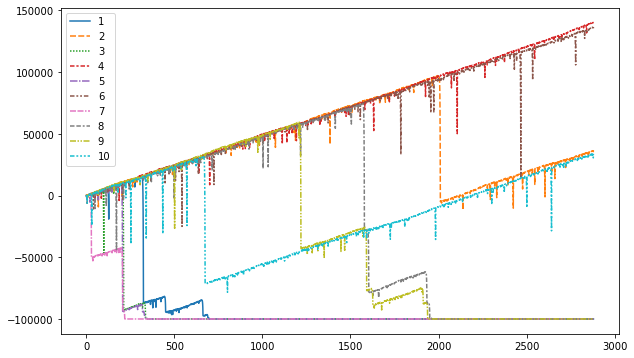

In [282]:
plt.figure(figsize=(10,6))
sns.lineplot(data=profit_df,ci=None)

In [309]:
szimulacio(100000,100,hanynap=100)

100%|██████████| 101/101 [00:01<00:00, 70.30it/s]


In [314]:
profit_df.shape

(2880, 100)

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>],
       [<AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>],
       [<AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSubp

<Figure size 720x432 with 0 Axes>

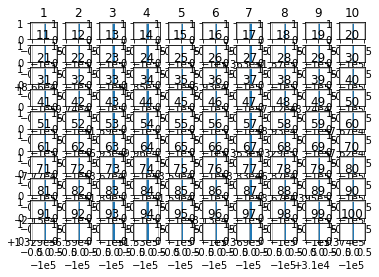

In [332]:
plt.figure(figsize=(10,6))
profit_df.iloc[-1:].hist()

In [358]:
pozitiv=[]
negativ=[]
for elem in (profit_df.transpose()[2879]):
    if elem>0:
        pozitiv.append(elem)
    else:
        negativ.append(elem)

In [359]:
len(pozitiv)/((len(negativ)+len(pozitiv)))

0.2224

<AxesSubplot:xlabel='2879', ylabel='Count'>

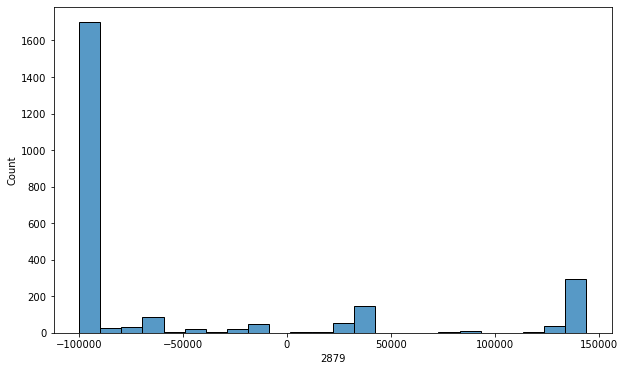

In [353]:
plt.figure(figsize=(10,6))
sns.histplot(data=profit_df.transpose(), x=2879)

In [345]:
profit_df.transpose()[2879].mean()

-55676.0

In [349]:
szimulacio(100000,100,hanynap=2500)

100%|██████████| 2501/2501 [03:37<00:00, 11.51it/s]


In [357]:
profit_df.transpose()[2879].mean()

-51535.44

<AxesSubplot:xlabel='2879', ylabel='Count'>

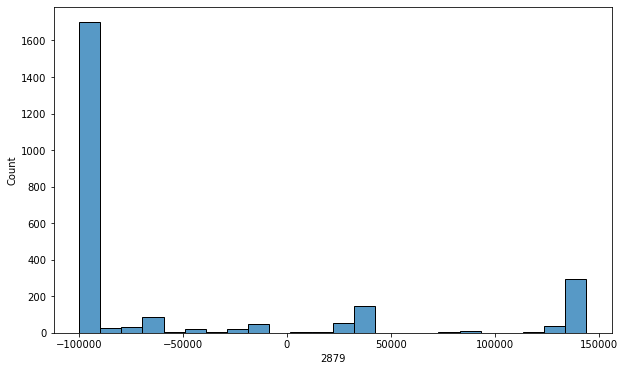

In [356]:
plt.figure(figsize=(10,6))
sns.histplot(data=profit_df.transpose(), x=2879)